<a href="https://colab.research.google.com/github/AnnaVithoriaMS/Churn-Banc-rio/blob/main/Trabalho_DS_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final de Introdução a Ciência de Dados

Anna Vithória Mendes de Sousa

[Fonte dos dados](https://www.kaggle.com/datasets/shivan118/churn-modeling-dataset)  

[Video de Apresentação](https://youtu.be/fTwlMQw4w00)

A análise de churn em dados bancários desempenha um papel crucial na compreensão do comportamento dos clientes e na identificação de fatores que podem influenciar a saída de clientes de uma instituição financeira. Neste estudo, exploramos um conjunto de dados que inclui informações bancárias, como saldo e pontuação de crédito, para analisar padrões relacionados ao churn.

A variável de churn, indicando se um cliente deixou ou permaneceu no banco, é crucial para entendermos as dinâmicas de retenção de clientes. Além disso, examinaremos variáveis como saldo e pontuação de crédito para identificar possíveis correlações ou padrões que possam influenciar a decisão dos clientes de permanecer ou sair.

Ao longo desta análise, utilizaremos técnicas estatísticas e visualizações de dados para destacar tendências, padrões e insights significativos. A compreensão desses fatores não apenas auxiliará na retenção de clientes, mas também fornecerá à instituição financeira informações valiosas para aprimorar seus produtos e serviços.

Exploraremos gráficos interativos, estatísticas descritivas e modelagem preditiva para criar uma narrativa abrangente sobre o churn em dados bancários. Ao final desta análise, esperamos fornecer recomendações acionáveis para melhorar a satisfação do cliente e, consequentemente, reduzir a taxa de churn.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import numpy as np

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

#### Dicionario de dados

- RowNumber	:Números de linha de 1 a 10.000
- CustomerId : IDs exclusivos para identificação de clientes bancários
- Surname : Sobrenome do cliente
- CreditScore : Pontuação de crédito do cliente
- Geography : O país ao qual o cliente pertence
- Gender : Genero do Cliente (Male = Masculino, Female = Feminino)
- Age : Idade do Cliente
- Tenure : Número de anos em que o cliente está no banco
- Balance : Saldo bancário do cliente
- NumOfProducts : Número de produtos bancários que o cliente está utilizando
- HasCrCard : Sinalizador binário para saber se o cliente possui cartão de crédito no banco ou não
- IsActiveMember : Sinalizador binário para saber se o cliente é um membro ativo do banco ou não
- EstimatedSalary : Salário estimado do cliente em dólares
- Exited : Sinalizador binário 1 se o cliente encerrou a conta no banco e 0 se o cliente for retido

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Pré-processamento

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df = df.drop(['Surname','RowNumber','CustomerId'],axis = 1)

### Analise Exploratória

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.mode()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,850,France,Male,37,2,0.0,1,1,1,24924.92,0


In [ ]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

##### Pontuação dos Clientes

A media de ponto dos clientes é de 650, os dados possuem uma distribuição bem proxima da normal, com uma assimetria de -0.072, indicando que há uma concentração maior das pontuações em valores menores, a moda, isto é, a pontuação que mais aparece é de 850, no total de 233 clientes, essa também é a pontuação máxima, isso representa 2.33% da amostra, alem disso quase 50% das observações estavam com pontuação abaixo da media.

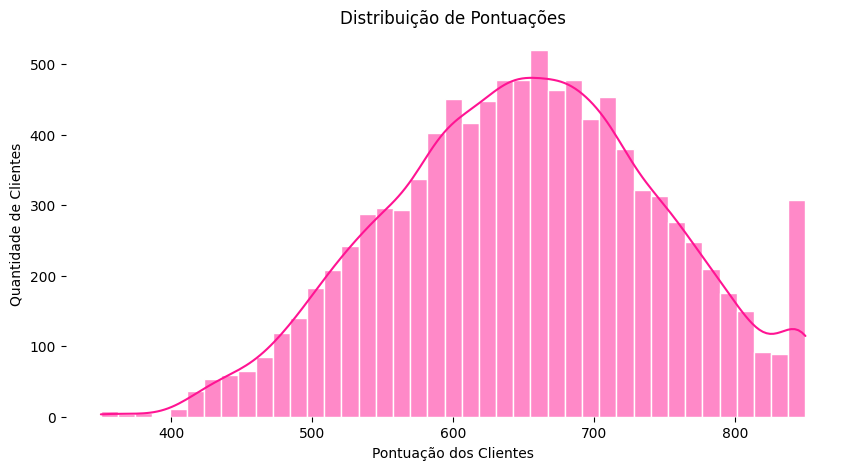

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'CreditScore',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Pontuação dos Clientes')
plt.title('Distribuição de Pontuações')
ax.set(frame_on=False)
plt.show()


In [ ]:
df.loc[(df['CreditScore'] == 850)].count()

CreditScore        233
Geography          233
Gender             233
Age                233
Tenure             233
Balance            233
NumOfProducts      233
HasCrCard          233
IsActiveMember     233
EstimatedSalary    233
Exited             233
dtype: int64

##### Idades

Entre os clientes a media de idade é de 39 anos, a idade com maior número de clientes é 37, ao todo são 478 pessoas com essa idade. A maior parte dos clientes são jovens ou adultos, isto é ente 18 e 60 anos, pelo menos 75% dos clientes tem menos de 44 anos e 95% tem idade menor ou igual a 60

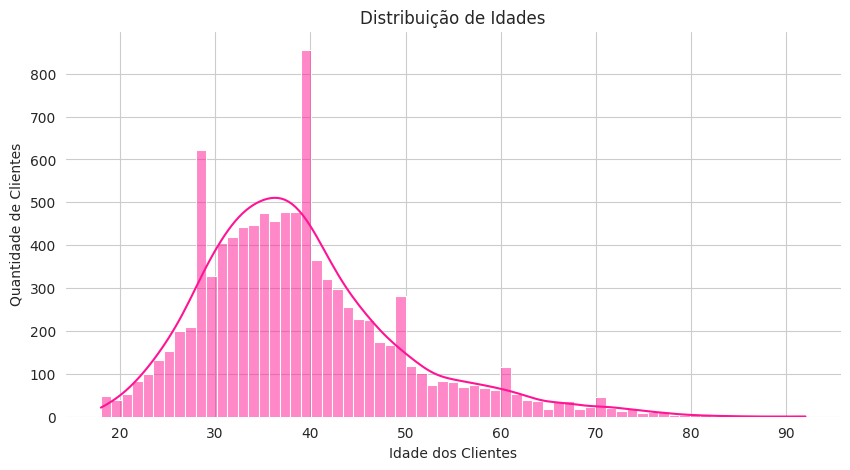

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'Age',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Idade dos Clientes')
plt.title('Distribuição de Idades')
ax.set(frame_on=False)
plt.show()


In [ ]:
df.loc[(df['Age'] == 37)].count()

CreditScore        478
Geography          478
Gender             478
Age                478
Tenure             478
Balance            478
NumOfProducts      478
HasCrCard          478
IsActiveMember     478
EstimatedSalary    478
Exited             478
dtype: int64

In [ ]:
df.loc[(df['Age'] <= 60)].count()

CreditScore        9536
Geography          9536
Gender             9536
Age                9536
Tenure             9536
Balance            9536
NumOfProducts      9536
HasCrCard          9536
IsActiveMember     9536
EstimatedSalary    9536
Exited             9536
dtype: int64

##### Periodo

Em media os clientes permanecem 5 anos no banco, sendo que a maior parte dos clientes estava a 2 anos, por sua vez haviam 413 clientes que estavam a menos de um ano  e 490 os que estavam a 10 anos.

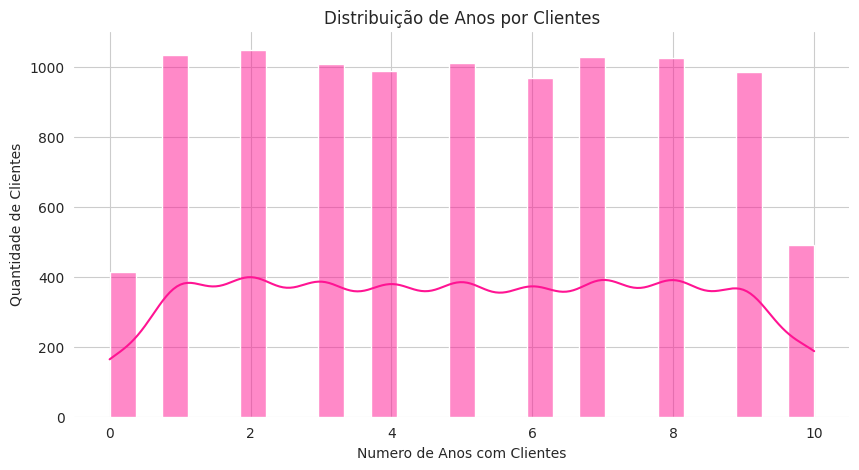

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'Tenure',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Numero de Anos com Clientes')
plt.title('Distribuição de Anos por Clientes')
ax.set(frame_on=False)
plt.show()

##### Saldo Bancário

Em relação aos saldos a maioria dos clientes tinham saldos bancario zerados, isso representa 36.17% dos clientes, ou seja, 3617 pessoas. Mas a media dos saldos bancarios é de 76485.89, há uma distribuição muito proxima a normal, mas a assimetria negativa, -0.14, indica uma maior concentração de clientes com saldos mais abaixos da media. Sendo que 75 pessoas tem saldo baixo de 50000, saldos bancarios entre 50000 e 100000 são 1509 clientes, no intervalo de 100000 a 150000 são 3830 clientes, os clientes com saldo entre 150000 e 200000 somam 935, entre 200000 e 250000 há 33 clientes, e apenas 1 cliente possuia saldo maior que 250000.

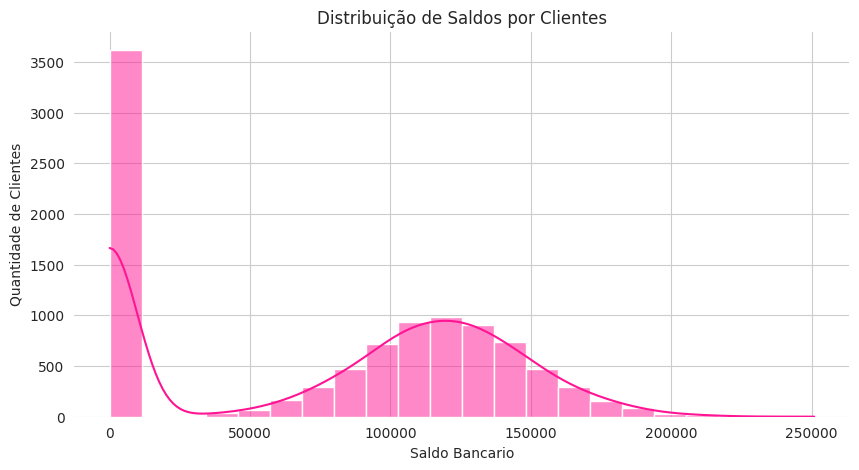

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'Balance',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Saldo Bancario')
plt.title('Distribuição de Saldos por Clientes')
ax.set(frame_on=False)
plt.show()

In [ ]:
df.loc[(df['Balance'] <= 250000) & (df['Balance'] > 200000)].count()

CreditScore        33
Geography          33
Gender             33
Age                33
Tenure             33
Balance            33
NumOfProducts      33
HasCrCard          33
IsActiveMember     33
EstimatedSalary    33
Exited             33
dtype: int64

In [ ]:
df.loc[(df['Balance'] <= 200000) & (df['Balance'] > 150000)].count()

CreditScore        935
Geography          935
Gender             935
Age                935
Tenure             935
Balance            935
NumOfProducts      935
HasCrCard          935
IsActiveMember     935
EstimatedSalary    935
Exited             935
dtype: int64

In [ ]:
df.loc[(df['Balance'] <= 150000) & (df['Balance'] > 100000)].count()

CreditScore        3830
Geography          3830
Gender             3830
Age                3830
Tenure             3830
Balance            3830
NumOfProducts      3830
HasCrCard          3830
IsActiveMember     3830
EstimatedSalary    3830
Exited             3830
dtype: int64

In [ ]:
df.loc[(df['Balance'] > 250000)].count()

CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [ ]:
df.loc[(df['Balance'] <= 50000) & (df['Balance'] > 0)].count()

CreditScore        75
Geography          75
Gender             75
Age                75
Tenure             75
Balance            75
NumOfProducts      75
HasCrCard          75
IsActiveMember     75
EstimatedSalary    75
Exited             75
dtype: int64

In [ ]:
df.loc[(df['Balance'] <= 100000) & (df['Balance'] > 50000)].count()

CreditScore        1509
Geography          1509
Gender             1509
Age                1509
Tenure             1509
Balance            1509
NumOfProducts      1509
HasCrCard          1509
IsActiveMember     1509
EstimatedSalary    1509
Exited             1509
dtype: int64

##### Salarios

A media dos salarios dos clientes é de 100090.24, o valor de maior ocorrencia foi de 24924.92, há uma uniformidade entre os dados

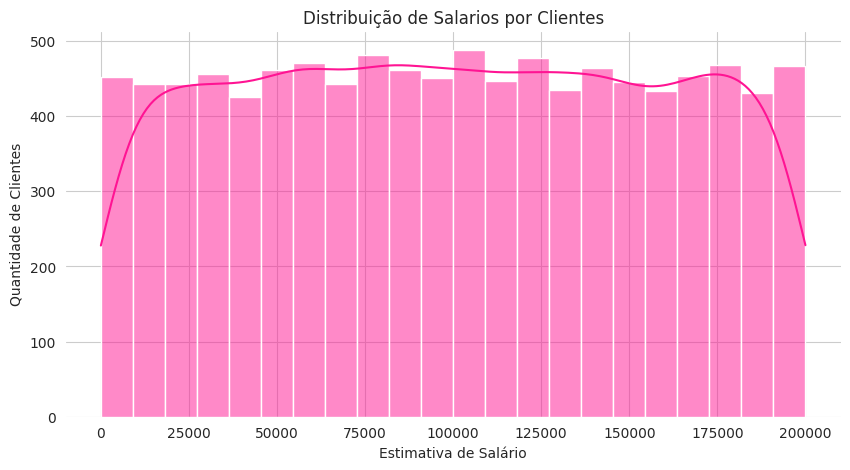

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'EstimatedSalary',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Estimativa de Salário')
plt.title('Distribuição de Salarios por Clientes')
ax.set(frame_on=False)
plt.show()

##### Produtos

A maior parte dos clientes possuem um unico produto disponibilizado pelo banco, isto é 5084 clientes adiquiriram um produto, respondendo a quase 51% dos clientes. Já 2 produtos são 4590 clientes, 3 produtos são adiquiridos por 266 clientes e 60 clentes possuem 4 produtos, sendo assim 96.74% clientes adiquiriram 1 ou 2 preodutos.

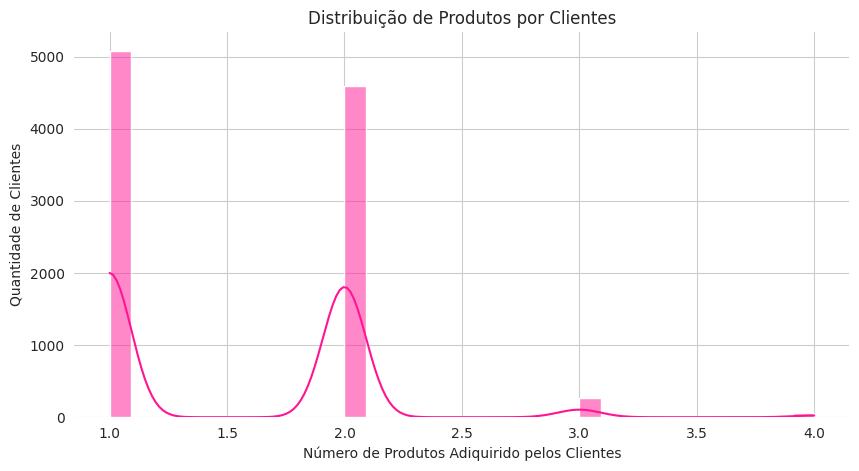

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
ax = sns.histplot(df, x = 'NumOfProducts',color='deeppink', kde=True)

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Número de Produtos Adiquirido pelos Clientes')
plt.title('Distribuição de Produtos por Clientes')
ax.set(frame_on=False)
plt.show()

In [ ]:
df.loc[(df['NumOfProducts'] == 1)].count()

CreditScore        5084
Geography          5084
Gender             5084
Age                5084
Tenure             5084
Balance            5084
NumOfProducts      5084
HasCrCard          5084
IsActiveMember     5084
EstimatedSalary    5084
Exited             5084
dtype: int64

##### Países

Entre os países de atuação do banco a maior quantidade de clientes esta na França ao todo são 5014 clientes, já na Espanha há 2477 clientes, enquanto que na Alemanha são 2509 clientes.

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Geography', data=df,palette="RdPu")

plt.ylabel('Quantidade de Clientes')
plt.xlabel('Países')
plt.title('Distribuição de Clientes po Países')
plt.show()


fig = px.histogram(df, x='Geography', color='Geography',
                   labels={'Geography': 'Países'},
                   title='Distribuição de Clientes por Países',
                   color_discrete_sequence=['magenta', 'pink', 'deeppink'])

fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    xaxis_title='Países',
    showlegend=False
)

# Exibindo o gráfico
fig.show()

##### Cartões de Crédito

Entre os clientes do banco os que obtiveram cartões de crédito somavam 7055, enquanto os que não tinham cartão totalizavam 2945


In [ ]:
"""
ax = sns.catplot(data=df, x="HasCrCard", kind="count",palette="RdPu")
ax.set_axis_labels("Cartões de Crédito", "Numero de Clientes")
ax.set_xticklabels(["Não", "Sim"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)
plt.legend(title="Legenda", labels=["Não", "Sim"])

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.suptitle("Distribuição de Clientes com Cartões de Crédito", y=1.02)
plt.show()"""

fig = px.histogram(df, x='HasCrCard', color='HasCrCard',
                   labels={'HasCrCard': 'Cartões de Crédito'},
                   title='Distribuição de Cartões de Crédito por Cliente',
                   color_discrete_sequence=['pink', 'deeppink'])

fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    xaxis_title='Cartões de Credito',
    showlegend=False
)


fig.show()

##### Membros Ativos

Entre os clientes que possuiam alguma ligação com o banco 5151 eram membros ativos e 4849 eram não ativos

In [ ]:
"""ax = sns.catplot(data=df, x="IsActiveMember", kind="count",palette="RdPu")
ax.set_axis_labels("Membros Ativos", "Numero de Clientes")
ax.set_xticklabels(["Não", "Sim"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)
plt.legend(title="Legenda", labels=["Não", "Sim"])

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.suptitle("Distribuição de Clientes Ativos", y=1.02)
plt.show()"""

fig = px.histogram(df, x='IsActiveMember', color='IsActiveMember',
                   labels={'IsActiveMember': 'Membros Ativos'},
                   title='Distribuição de Membros Ativos',
                   color_discrete_sequence=['pink', 'deeppink'])

fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    xaxis_title='Membros Ativos',
    showlegend=False
)


fig.show()

#### Genero

Entre os clientes 5457 deles eram do sexo masculino enquanto 4543 eram do feminino

In [ ]:
"""ax = sns.catplot(data=df, x="Gender", kind="count",palette="RdPu")
ax.set_axis_labels("Membros Ativos", "Numero de Clientes")
ax.set_xticklabels(["Não", "Sim"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)
plt.legend(title="Legenda", labels=["Não", "Sim"])

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.suptitle("Distribuição de Clientes por Genero", y=1.02)
plt.show()"""

fig = px.histogram(df, x='Gender', color='Gender',
                   labels={'Gender': 'Genero'},
                   title='Distribuição por Genero',
                   color_discrete_sequence=['pink', 'deeppink'])

fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    xaxis_title='Genero',
    showlegend=False
)


fig.show()

#### Cancelamentos

Entre os clientes que possuiam relação com o banco 2037 deixaram de ser clientes, por sua vez 7963 continuaram como clientes do banco.

In [ ]:
"""ax = sns.catplot(data=df, x="Exited", kind="count",palette="RdPu")
ax.set_axis_labels("Contas Encerradas", "Numero de Clientes")
ax.set_xticklabels(["Não", "Sim"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)
plt.legend(title="Legenda", labels=["Não", "Sim"])

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.suptitle("Distribuição de Contas Encerradas", y=1.02)
plt.show()
"""
fig = px.histogram(df, x='Exited', color='Exited',
                   labels={'Exited': 'Cancelamentos'},
                   title='Distribuição de Cancelamentos',
                   color_discrete_sequence=['pink', 'deeppink'])

fig.update_layout(
    yaxis_title='Quantidade de Clientes',
    xaxis_title='Cancelamentos',
    showlegend=False
)


fig.show()

### Correlações

Não há correlações significativas entre as features, isto é, a maior parte das correlações são muito pequenas ou até mesmo negativas, nesse caso quando uma variável cresce a outra diminui. No caso da coluna de cancelamentos as maiores correlações estavam com Idade e Saldo Bancarios, no entanto essas correlção ainda são pequenas.

In [ ]:
"""correlation_matrix = df.corr()
sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()"""

correlation_matrix = df.corr()


fig = px.imshow(correlation_matrix,text_auto=True,
                labels=dict(x="Características", y="Características", color="Correlação"),
                title='Matriz de Correlação',
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='RdPu')

fig.update_layout(coloraxis_colorbar=dict(title='Correlação'))
fig.update_layout(height=800, width=800)


fig.show()

In [ ]:
"""sns.pairplot(df, hue='Exited',palette='RdPu',diag_kind="hist")
plt.show()
"""

fig = px.scatter_matrix(df, dimensions=["CreditScore", "Age", "Balance", "EstimatedSalary"], color="Exited",
                        labels={'CreditScore': 'Pontuação de Crédito', 'Age': 'Idade', 'Balance': 'Saldo', 'EstimatedSalary': 'Salário Estimado'},
                        title='Matriz de Dispersão - Relação entre Variáveis e Churn',
                        color_discrete_map={0: 'lightgreen', 1: 'lightcoral'},
                       color_continuous_scale='magenta')

fig.update_layout(height=600, width=900)

fig.show()

### Charne

#### Relação entre Pontuações de Credito e o Cancelamento


As medias de pontuação entre os clientes que cancelaram o serviço ou não são bem proximas, enquanto a media de clientes com cancelamento foi de 645.35, sem cancelamento foi de 651.85. Não uma relaçao direta entre os clientes que cancelaram ou não os serviços com as suas pontuações.  

In [ ]:
df[['CreditScore','Exited']].groupby('Exited').describe()

CreditScore                                                           
             count        mean         std    min    25%    50%    75%    max
Exited                                                                       
0           7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1           2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0

In [ ]:
"""lm_plot = sns.lmplot(data=df, x="EstimatedSalary", y="Balance", hue='Exited', col="Exited", height=5, palette='RdPu')

lm_plot.set_axis_labels("Salarios", "Saldos Bancários")
lm_plot.set_titles(col_template="{col_name} - Cancelamento {col_var}")

plt.suptitle('Relação entre Salarios, Saldos Bancarios e Cancelamento', y=1.02)

plt.show()"""

fig = px.scatter(df, x="EstimatedSalary", y="Balance", color="Exited", facet_col="Exited",
                 labels={'EstimatedSalary': 'Salário Estimado', 'Balance': 'Saldo'},
                 title='Relação entre Salário Estimado, Saldo e Churn',
                 height=500, width=800, facet_col_wrap=1,
                 color_discrete_sequence=['lightcoral', 'lightgreen'], color_continuous_scale='magenta')


fig.update_layout(
    yaxis_title='Saldo',
    xaxis_title='Salário Estimado',
    showlegend=False
)


fig.show()


In [ ]:
"""plt.figure(figsize=(12,6))
box_plot = sns.boxplot(data=df, x="Exited", y='CreditScore', palette='RdPu', width=0.5)

box_plot.set_xlabel("Contas Encerradas")
box_plot.set_ylabel("Pontuações dos Clientes")
box_plot.set_title("Distribuição de Pontuação por Contas Encerradas")

plt.subplots_adjust(bottom=0.2)

plt.show()"""


fig = px.box(df, x='Exited', y='CreditScore', color='Exited',
             labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'CreditScore': 'Pontuação dos Clientes'},
             title='Distribuição das Pontuações para Clientes Churn e Não Churn',
             category_orders={'Exited': [0, 1]}, width=800, height=500,
             color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(height=600, width=900)

fig.show()

#### Relação entre Idade e o Cancelamento


A media da idade dos clientes que realizaram o cancelamento é 44 anos, sendo maior que a media dos clientes que não realizaram o cancelammento, que é de 37 anos. No geral as pessoas que não fizeram o cancelamento são mais jovens, tendo menos de 40 anos, isto é, 5733 pessoas tem idade entre 18 e 40 anos, isso representa 71,97% do total de pessoas que não cacelaram, enquanto que essa mesma faixa de idade para o outro grupo é de 33.68%. A maior concentração de pessoas que realizaram o cancelamento estavam na faixa entre 40 e 60 anos, 60.67% dos clientes.

In [ ]:
df[['Age','Exited']].groupby('Exited').describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

In [ ]:
"""plt.figure(figsize=(12,6))
box_plot = sns.boxplot(data=df, x="Exited", y='Age', palette='RdPu', width=0.5)

box_plot.set_xlabel("Contas Encerradas")
box_plot.set_ylabel("Idades")
box_plot.set_title("Distribuição de Idades por Contas Encerradas")

plt.subplots_adjust(bottom=0.2)

plt.show()"""

fig = px.box(df, x='Exited', y='Age', color='Exited',
             labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'Age': 'Idade dos Clientes'},
             title='Distribuição das Idades para Clientes Churn e Não Churn',
             category_orders={'Exited': [0, 1]}, width=800, height=500,
             color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(height=500, width=900)
fig.show()


In [ ]:
df.loc[(df['Age'] <= 60) & (df['Age'] > 40)]['Exited'].value_counts()

0    1881
1    1236
Name: Exited, dtype: int64

In [ ]:
df.loc[(df['Age'] <= 40)]['Exited'].value_counts()

0    5733
1     686
Name: Exited, dtype: int64

In [ ]:
fig_churn = px.histogram(df[df['Exited'] == 1], x="Age",
                          labels={'Age': 'Idade'},
                          title='Distribuição de Idades para Clientes Churn (Exited = 1)',
                          color_discrete_sequence=['deeppink'])

fig_no_churn = px.histogram(df[df['Exited'] == 0], x="Age",
                             labels={'Age': 'Idade'},
                             title='Distribuição de Idades para Clientes Não Churn (Exited = 0)',
                             color_discrete_sequence=['lightpink'])

fig_churn.update_layout(height=400, width=600)
fig_no_churn.update_layout(height=400, width=600)

fig_churn.show()
fig_no_churn.show()

#### Relação entre Período e o Cancelamento

Entre os cancelamentos há um aumento consideravel entre as pessoas que estao a menos de um ano e as que são clientes a um ano, isto é, em menos de um ano há 95 cancelamentos, enquanto que para um ano são 232 cancelamentos, isso é um aumento de 144,21%, sendo assim, a quantidade cancelamento cresce no primeiro ano e em seguida se mantem estásvel. No entanto, quem esta a mais tempo no banco cancela menos, pois a uma queda entre a quantidade de cancelamentos entre 9 e 10 anos.

In [ ]:
df[['Tenure','Exited']].groupby('Exited').describe()

Tenure                                              
         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0

In [ ]:
"""plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='dodge', bins=20, palette='RdPu')
plt.title('Distribuição de Período no Banco para Clientes Churn e Não Churn')
plt.xlabel('Período no Banco')
plt.ylabel('Contagem')
plt.show()"""

fig = px.histogram(df, x="Tenure", color='Exited', barmode='group',text_auto=True,
                   labels={'Tenure': 'Período no Banco', 'Exited': 'Churn (1 - Churn, 0 - Não Churn)'},
                   title='Distribuição de Período no Banco para Clientes Churn e Não Churn',
                   category_orders={'Exited': [0, 1]},
                   color_discrete_map={0: 'lightpink', 1: 'deeppink'},
                   nbins=20)

fig.update_layout(height=500, width=900)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    yaxis_title='Contagem',
    xaxis_title='Período no Banco'
)

fig.show()

#### SaldosBancário

Os saldos bancario dos clientes que não realizaram o cancelamento tem média menorr se comparardo a media dos clientes que realizaram o cancelamento, o primeiro grupo também possuiam mais clientes com contas zeradas, pois 40% dos clientes que permaneceram com sua ligação com o banco tinham saldos zerados, enquanto que os clientes que romperam com a empresa 24% estavam sem dinheiro em caixa.

In [ ]:
df.loc[(df['Balance'] == 0)]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [ ]:
df[['Balance','Exited']].groupby('Exited').describe()

Balance                                                        \
         count          mean           std  min       25%        50%   
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                              
              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09

In [ ]:
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='RdPu')
plt.title('Distribuição dos Saldos para Clientes Churn e Não Churn')
plt.xlabel('Exited (1 - Churn, 0 - Não Churn)')
plt.ylabel('Balance')
plt.show()"""


fig = px.box(df, x='Exited', y='Balance', color='Exited',
             labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'Balance': 'Saldos dos Clientes'},
             title='Distribuição dos Saldos para Clientes Churn e Não Churn',
             category_orders={'Exited': [0, 1]}, width=800, height=500,
             color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(height=500, width=900)
fig.show()

In [ ]:
fig_churn = px.histogram(df[df['Exited'] == 1], x="Balance",
                          labels={'Balance': 'Saldo Bancario'},
                          title='Distribuição de Saldo Bancario para Clientes Churn (Exited = 1)',
                          color_discrete_sequence=['deeppink'])

fig_no_churn = px.histogram(df[df['Exited'] == 0], x="Balance",
                             labels={'Balance': 'Saldo Bancario'},
                             title='Distribuição de Saldo Bancario para Clientes Não Churn (Exited = 0)',
                             color_discrete_sequence=['lightpink'])

fig_churn.update_layout(height=400, width=600)
fig_no_churn.update_layout(height=400, width=600)

fig_churn.show()
fig_no_churn.show()

#### Produtos

In [ ]:
df[['NumOfProducts','Exited']].groupby('Exited').describe()

NumOfProducts                                             
               count      mean       std  min  25%  50%  75%  max
Exited                                                           
0             7963.0  1.544267  0.509536  1.0  1.0  2.0  2.0  3.0
1             2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0

In [ ]:
"""plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NumOfProducts', hue='Exited', multiple='dodge', bins=20, palette='RdPu')
plt.title('Distribuição de Produtos do Banco para Clientes Churn e Não Churn')
plt.xlabel('Produtos no Banco')
plt.ylabel('Contagem')
plt.show()"""

fig = px.histogram(df, x="NumOfProducts", color='Exited', barmode='group',text_auto=True,
                   labels={'NumOfProducts': 'Produtos n=do Banco', 'Exited': 'Churn (1 - Churn, 0 - Não Churn)'},
                   title='Distribuição de Produtos do Banco para Clientes Churn e Não Churn',
                   category_orders={'Exited': [0, 1]},
                   color_discrete_map={0: 'lightpink', 1: 'deeppink'},
                   nbins=20)

fig.update_layout(height=500, width=900)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    yaxis_title='Contagem',
    xaxis_title='Produtos no Banco'
)

fig.show()

#### Salario dos Clientes

In [ ]:
df[['EstimatedSalary','Exited']].groupby('Exited').describe()

EstimatedSalary                                                \
                 count           mean           std    min       25%   
Exited                                                                 
0               7963.0   99738.391772  57405.586966  90.07  50783.49   
1               2037.0  101465.677531  57912.418071  11.58  51907.72   

                                          
              50%         75%        max  
Exited                                    
0        99645.04  148609.955  199992.48  
1       102460.84  152422.910  199808.10

In [ ]:
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='RdPu')
plt.title('Distribuição dos Salarios para Clientes Churn e Não Churn')
plt.xlabel('Exited (1 - Churn, 0 - Não Churn)')
plt.ylabel('Balance')
plt.show()"""


fig = px.box(df, x='Exited', y='EstimatedSalary', color='Exited',
             labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'EstimatedSalary': 'Salarios dos Clientes'},
             title='Distribuição dos Salarios para Clientes Churn e Não Churn',
             category_orders={'Exited': [0, 1]}, width=800, height=500,
             color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(height=500, width=900)
fig.show()

In [ ]:
fig_churn = px.histogram(df[df['Exited'] == 1], x="EstimatedSalary",
                          labels={'EstimatedSalary': 'Salario dos Clientes'},
                          title='Distribuição de Salario dos Clientes Churn (Exited = 1)',
                          color_discrete_sequence=['deeppink'])

fig_no_churn = px.histogram(df[df['Exited'] == 0], x="EstimatedSalary",
                             labels={'EstimatedSalary': 'Saldo Bancario'},
                             title='Distribuição de Salario dos Clientes Não Churn (Exited = 0)',
                             color_discrete_sequence=['lightpink'])

fig_churn.update_layout(height=400, width=600)
fig_no_churn.update_layout(height=400, width=600)

fig_churn.show()
fig_no_churn.show()

####  Paises x Churn

In [ ]:
fig = px.histogram(df, x="Exited", color='Geography', barmode='group',
                   category_orders={'Exited': [0, 1]},
                   labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'Geography': 'Países'},
                   title='Distribuição de Churn por Paises',
                   color_discrete_map={'France': 'magenta', 'Germany': 'pink', 'Spain': 'deeppink'},
                   height=400)

# Adicionando rótulos informativos
fig.update_layout(
    xaxis_title='Churn (1 - Churn, 0 - Não Churn)',
    yaxis_title='Contagem',
    legend_title='Paises'
)

fig.show()

#### Cartões de Crédito X Churn

In [ ]:
fig = px.histogram(df, x="Exited", color='HasCrCard', barmode='group',
                   category_orders={'Exited': [0, 1]},
                   labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'HasCrCard': 'Cartões de Crédito'},
                   title='Distribuição de Churn por Cartões de Crédito',
                   color_discrete_map={0:'lightpink',1:'deeppink'},
                   height=400)

# Adicionando rótulos informativos
fig.update_layout(
    xaxis_title='Churn (1 - Churn, 0 - Não Churn)',
    yaxis_title='Contagem',
    legend_title='Cartões de Crédito'
)

fig.show()

#### Clientes x Ativos

In [ ]:
fig = px.histogram(df, x="Exited", color='IsActiveMember', barmode='group',
                   category_orders={'Exited': [0, 1]},
                   labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'IsActiveMember': 'Membros Ativos'},
                   title='Distribuição de Churn por Membros Ativos',
                   color_discrete_map={0:'lightpink',1:'deeppink'},
                   height=400)


fig.update_layout(
    xaxis_title='Churn (1 - Churn, 0 - Não Churn)',
    yaxis_title='Contagem',
    legend_title='Membros Ativos'
)

fig.show()

#### Genero X Churn

In [ ]:
fig = px.histogram(df, x="Exited", color='Gender', barmode='group',
                   category_orders={'Exited': [0, 1]},
                   labels={'Exited': 'Churn (1 - Churn, 0 - Não Churn)', 'Gender': 'Genero'},
                   title='Distribuição de Churn por Genero',
                   color_discrete_map={'Male':'lightpink','Female':'deeppink'},
                   height=400)

# Adicionando rótulos informativos
fig.update_layout(
    xaxis_title='Churn (1 - Churn, 0 - Não Churn)',
    yaxis_title='Contagem',
    legend_title='Genero'
)

fig.show()

## Treinamento dos Modelos


O treinamento dos modelos foram realizados inicialmente com uma divisão dos dados de treino e teste, sendo 70% para treino e 30% para o teste. A normalização dos dados foi feita com o StandardScaler e o tratamento dos dados categóricos com o OneHotEncoder. Ao final o conjunto de treino ficou com 7000 observações enquanto o de teste tinha 3000.

Os modelos escolhidos foram modelos de classificação, já que o objetivo é identificar a que classe pertence a instância se ela é ou não um churn. Sendo assim foram treinados os algoritmos, Logistic Regression, Random Forest, KNN e SVM. As metrícas de análise dos algoritmos foram acurácia, precisão, recall e f1score, alem da curva ROC e das Matrizes de Confusão.

Inicialmente, foi aplicado um GridSearch, buscando os parametros adequados entre os possiveis, são feitas combinações desses parametros e uma validação por cross-validation com 5 kfolds,nesse caso a combinação de hiperparametros que apresentasse o melhor fscore era a escolhida, em seguida era feito o treinamento do modelo com a combinação apontada pelo grid, e depois foram analisados os resulatos de treino e teste, buscando identificar possíveis overfitings e encontrar o modelo que performace melhor.

***Hiperparametros***:

Logistic Regression :

- penalty : 'l1','l2'
- C: 0.1, 1, 10, 100
    
A melhor combinação foi 'C' = 1 e 'penalty' = l2, com fscore de 0.773

Random Forest:

- max_depth : None,2,5, 10,
- criterion :'entropy','gini',
- n_estimators : 10,20,100

Os parametros escolhidos foram 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100 e o fscore de 0.773

KNN:

- 'n_neighbors': varaiando de 1 a 20

O número de vizinhos foi 5 e a métrica 0.813

SVM:

- 'C': 0.1, 1, 10,
- 'gamma': 1, 0.1, 0.01,
- 'kernel': 'rbf', 'linear'

A escolha de parametro resultou em'C': 10, 'gamma': 0.1, 'kernel': 'rbf' e a metreica igual a 0.835




#### Bibliotecas


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Divisão entre conjuntos de treino e teste

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

#### Modificação e Normalização dos dados númericos e catégoricos

In [ ]:
sim_imp_cat = SimpleImputer(strategy = "constant", fill_value = "unknown")
sim_imp_cat.fit(X_train.select_dtypes(exclude = np.number)) # excluímos tudo que for dado numérico
X_train_cat = sim_imp_cat.transform(X_train.select_dtypes(exclude = np.number))
X_test_cat = sim_imp_cat.transform(X_test.select_dtypes(exclude = np.number))

encoder = OneHotEncoder(sparse_output = False).fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

In [ ]:
sim_imp = SimpleImputer(strategy = "mean").fit(X_train.select_dtypes(include = np.number))
X_train_num = sim_imp.transform(X_train.select_dtypes(include = np.number))
X_test_num = sim_imp.transform(X_test.select_dtypes(include = np.number))

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [ ]:
X_train_num.shape

(7000, 8)

In [ ]:
X_train_cat.shape

(7000, 5)

In [ ]:
X_train = np.concatenate((X_train_num, X_train_cat), axis = 1)
X_test = np.concatenate((X_test_num, X_test_cat), axis = 1)

In [ ]:
X_train.shape

(7000, 13)

In [ ]:
X_test.shape

(3000, 13)

### Logistic Regression

In [ ]:
splitter = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid={'penalty' : ['l1','l2'],'C': [0.1, 1, 10, 100]}


LR = LogisticRegression()


grid_LR = GridSearchCV(estimator = LR,
                           param_grid = param_grid,
                           scoring = 'f1_weighted',
                           cv = splitter,
                           return_train_score = True)

In [ ]:
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_LR.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
grid_LR.best_score_

0.772737048545445

In [ ]:
lr = LogisticRegression(penalty = 'l2',C = 1).fit(X_train, y_train)


#### Avaliando o conjunto de Teste

In [ ]:
y_pred = lr.predict(X_test)
conf_matriz = confusion_matrix(y_test,y_pred)
conf_matriz

array([[2318,   98],
       [ 468,  116]])

In [ ]:
fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão Regressão Logística com Dados de Teste',
                x=['No', 'Yes'], y=['No', 'Yes'],
                text_auto=True, aspect="auto",
                color_continuous_scale=['#FFC0CB', '#FF69B4']
               )

fig.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [ ]:

y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500,
    color_discrete_sequence=['pink']
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### Random Forest

In [ ]:
param_grid={'max_depth':[2,5, 10],'criterion':['entropy','gini'],'n_estimators':[10,20,100]}


RF= RandomForestClassifier()


grid_RF = GridSearchCV(estimator = RF,
                           param_grid = param_grid,
                           scoring = 'f1_weighted',
                           cv = splitter,
                           return_train_score = True)

grid_RF.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [10, 20, 100]},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [ ]:
grid_LR.best_score_

0.772737048545445

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100).fit(X_train, y_train)

#### Avaliando o Conjunto de Teste

In [ ]:
y_pred = rf.predict(X_test)
conf_matriz = confusion_matrix(y_test,y_pred)
conf_matriz

array([[2349,   67],
       [ 327,  257]])

In [ ]:
fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão Random Forest com Dados de Teste',
                x=['No', 'Yes'], y=['No', 'Yes'],
                text_auto=True, aspect="auto",
                color_continuous_scale=['#FFC0CB', '#FF69B4']
               )

fig.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.44      0.57       584

    accuracy                           0.87      3000
   macro avg       0.84      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500,
    color_discrete_sequence=['pink']
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### KNN

In [ ]:
param_grid={'n_neighbors': range(1,21)}


KNN= KNeighborsClassifier()


grid_KNN = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = 'f1_weighted',
                           cv = splitter,
                           return_train_score = True)

grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, return_train_score=True,
             scoring='f1_weighted')

In [ ]:
grid_KNN.best_params_

{'n_neighbors': 5}

In [ ]:
grid_KNN.best_score_

0.813565072300881

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

#### Avaliando o Conjunto de Teste

In [ ]:
y_pred = knn.predict(X_test)
conf_matriz = confusion_matrix(y_test,y_pred)
conf_matriz

array([[2297,  119],
       [ 359,  225]])

In [ ]:
fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão KNN com Dados de Teste',
                x=['No', 'Yes'], y=['No', 'Yes'],
                text_auto=True, aspect="auto",
                color_continuous_scale=['#FFC0CB', '#FF69B4']
               )

fig.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2416
           1       0.65      0.39      0.48       584

    accuracy                           0.84      3000
   macro avg       0.76      0.67      0.70      3000
weighted avg       0.82      0.84      0.82      3000



In [ ]:
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500,
    color_discrete_sequence=['pink']
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
SVM= SVC()


grid_SVM = GridSearchCV(estimator = SVM,
                           param_grid = param_grid,
                           scoring = 'f1_weighted',
                           cv = splitter,
                           return_train_score = True)

grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_SVM.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid_SVM.best_score_

0.8355046059238569

In [ ]:
svm = SVC(C = 10, gamma = 0.1, kernel= 'rbf').fit(X_train, y_train)

#### Avaliando o Conjunto de Teste

In [ ]:
y_pred = knn.predict(X_test)
conf_matriz = confusion_matrix(y_test,y_pred)
conf_matriz

array([[2297,  119],
       [ 359,  225]])

In [ ]:
fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão SVM com Dados de Teste',
                x=['No', 'Yes'], y=['No', 'Yes'],
                text_auto=True, aspect="auto",
                color_continuous_scale=['#FFC0CB', '#FF69B4']
               )

fig.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2416
           1       0.65      0.39      0.48       584

    accuracy                           0.84      3000
   macro avg       0.76      0.67      0.70      3000
weighted avg       0.82      0.84      0.82      3000



# Conclusão


É possível concluir que os modelos não realizam seus trabalhos de maneira satisfatória, pois eles realizam um bom trabalho quando classificam os não cancelamentos, por sua vez quando o objetivo é classificar os cancelamentos os modelos não se comportam muito bem.

Analisando apenas a acuracia é visível que o Random Forest se saiu melhor, porém isso não é sufiente, então é necessario observar a precisão e o recall, além do f1-score

**Logistic Regression**


Há um certa piora nos resultados de teste e treino, principalmente no que diz respeito a classe de churn, onde a precisão e, principalmete, o recall apresentaram valores bem abaixo. Para a classe 1 (Churn), a precisão é de 54%. Isso indica que 54% das instâncias classificadas como Churn pelo modelo são de fato da classe Churn, um resultado bem abaixo do que é considerado bom, já que é um pouco a mais de 50%, equivale a jogar uma moeda. No caso do recall, para a classe 1, a revocação é de 220%. Ou seja, o modelo conseguiu capturar apenas 20% das instâncias reais da classe Churn, o que é um resulato bem ruim, pois o modelo identificou corretamente apenas 20% de todas as instâncias reais da classe Churn. Mostrando que o modelo não consegue prever clientes propensos a deixar o banco.


O modelo executa melhor quando identifica os Não Churns, os resultados de recall  96% indica que o modelo identificou corretamente 96% de todas as instâncias reais da classe Não Churn. A média ponderada é 0.78, considerando o desequilíbrio de classes, e destaca que a métrica está mais influenciada pela classe majoritária (Não Churn).

Matriz de Confusão

- Verdadeiros Positivos (TP): 116 clientes foram corretamente classificados como Churn (Classe 1).
- Falsos Positivos (FP): 98 clientes foram incorretamente classificados como Churn, mas na verdade não cancelaram o serviço (Classe 0).
- Verdadeiros Negativos (TN): 2318 clientes foram corretamente classificados como Não Churn (Classe 0).
- Falsos Negativos (FN): 468 clientes foram incorretamente classificados como Não Churn, mas na verdade cancelaram o serviço (Classe 1)

**Random Forest**

 88 % de precisão significa que, das instâncias classificadas como Churn, 88% são de fato da classe Churn. Já o recall de 44% indica que o modelo capturou apenas 44% das instâncias reais da classe Churn. Os resultados de precisão para a classe 1 são considerados razoáveis, porem os de recall e o fscore não são nada bons. A acurácia geral do modelo é de 87%, indicando a proporção geral de instâncias corretamente classificadas em relação ao total. Pode ser influenciada pelo desequilíbrio de classes.

 Por sua Macro Avg (Média Macro), isto é, a média macro das métricas é 0.75, representando o desempenho médio nas duas classes, sem considerar o desequilíbrio.Enquanto que a Weighted Avg (Média Ponderada),  a média ponderada é 0.85, considerando o desequilíbrio de classes. Indica um desempenho mais influenciado pela classe majoritária

Matriz de Confusão

- Verdadeiros Positivos (TP):  259 clientes foram corretamente classificados como Churn (Classe 1).
- Falsos Positivos (FP):  65 clientes foram incorretamente classificados como Churn, mas na verdade não cancelaram o serviço (Classe 0).
- Verdadeiros Negativos (TN): 2351 clientes foram corretamente classificados como Não Churn (Classe 0).
- Falsos Negativos (FN): 325 clientes foram incorretamente classificados como Não Churn, mas na verdade cancelaram o serviço (Classe 1).


**KNN**

No caso do KNN, o modelo, assim como os outros, se comporta melhor na identificação de não churn. Por sua ve ao se tratar da classe 1 os resultados são bem abaixo do esperado, com uma precisão e recall de 65% e 39%, respectivamente, temos uma incapacidade do modelo de identificar corretamente quando houve os cancelamentos. E possível afirmar que a precisão é até razoável, mas a revocação indica desafios em identificar corretamente os clientes que realmente cancelam o serviço.

Matriz de Confusão
- Verdadeiros Positivos (TP): 225 clientes foram corretamente classificados como Churn (Classe 1).
- Falsos Positivos (FP): 119 clientes foram incorretamente classificados como Churn, mas na verdade não cancelaram o serviço (Classe 0).
- Verdadeiros Negativos (TN): 2297 clientes foram corretamente classificados como Não Churn (Classe 0).
- Falsos Negativos (FN): 359 clientes foram incorretamente classificados como Não Churn, mas na verdade cancelaram o serviço (Classe 1)

**SVM**

O modelo performa bem quando classifica a classe 0, ou seja, quando não houve o cancelameto, por sua vez no outro grupo os resultados deixama desejar, a precisão de 65% parece razoável, mas 65% de precisão significa que, das instâncias classificadas como Churn, 65% são de fato da classe Churn, logo os 45% das classificações foram equivocadas. Já o recall de 39% é bem baixo, assim o modelo só conseguiu capturar 39% das instancias reais da classe.

Matriz de Confusão

- Verdadeiros Positivos (TP): 225 clientes foram corretamente classificados como Churn (Classe 1).
- Falsos Positivos (FP): 119 clientes foram incorretamente classificados como Churn, mas na verdade não cancelaram o serviço (Classe 0).
- Verdadeiros Negativos (TN): 2297 clientes foram corretamente classificados como Não Churn (Classe 0).
- Falsos Negativos (FN): 359 clientes foram incorretamente classificados como Não Churn, mas na verdade cancelaram o serviço (Classe 1).

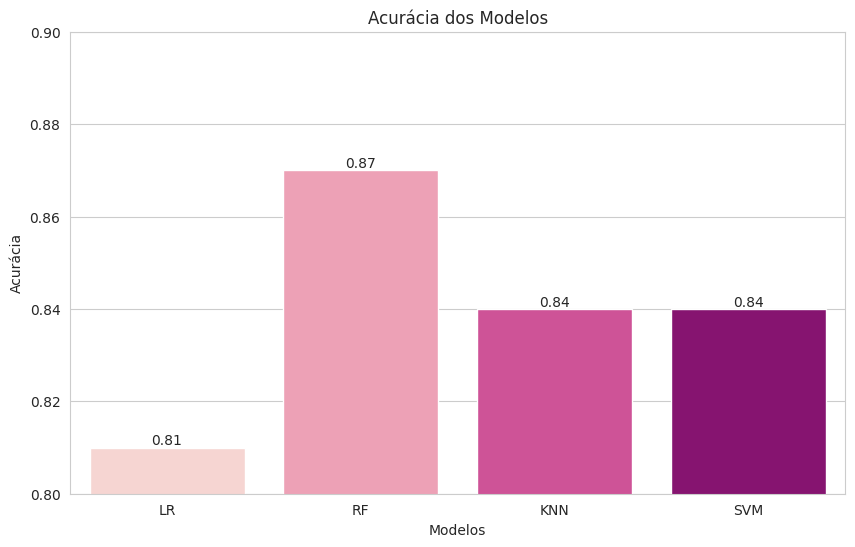

In [ ]:
modelos = ['LR', 'RF', 'KNN', 'SVM']
acuracia = [0.81, 0.87, 0.84, 0.84]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=modelos, y=acuracia, palette='RdPu')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Acurácia dos Modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.ylim(0.8, 0.9)
plt.show()

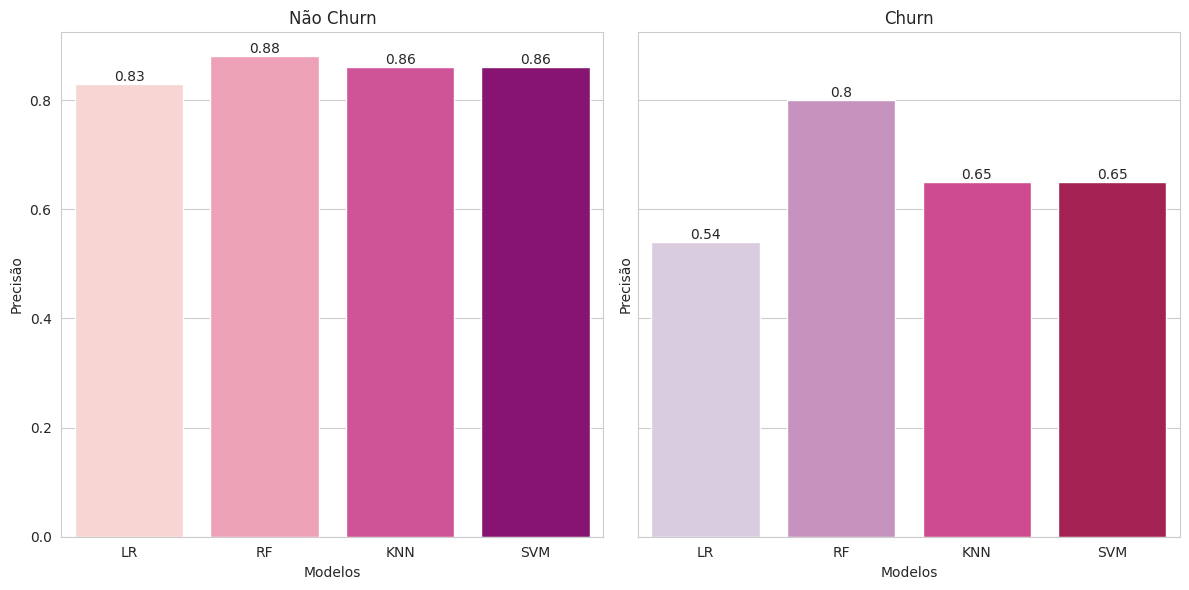

In [ ]:
modelos = ['LR', 'RF', 'KNN', 'SVM']
nao_churn = {'precision': [0.83, 0.88, 0.86, 0.86]}
churn = {'precision': [0.54, 0.80, 0.65, 0.65]}

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot(x=modelos, y=nao_churn['precision'], ax=axs[0], palette='RdPu')
axs[0].set_title('Não Churn')
axs[0].set_ylabel('Precisão')
axs[0].set_xlabel('Modelos')
axs[0].bar_label(axs[0].containers[0], fontsize=10);
sns.barplot(x=modelos, y=churn['precision'], ax=axs[1], palette='PuRd')
axs[1].set_title('Churn')
axs[1].set_ylabel('Precisão')
axs[1].set_xlabel('Modelos')
axs[1].bar_label(axs[1].containers[0], fontsize=10);

plt.tight_layout()
plt.show()


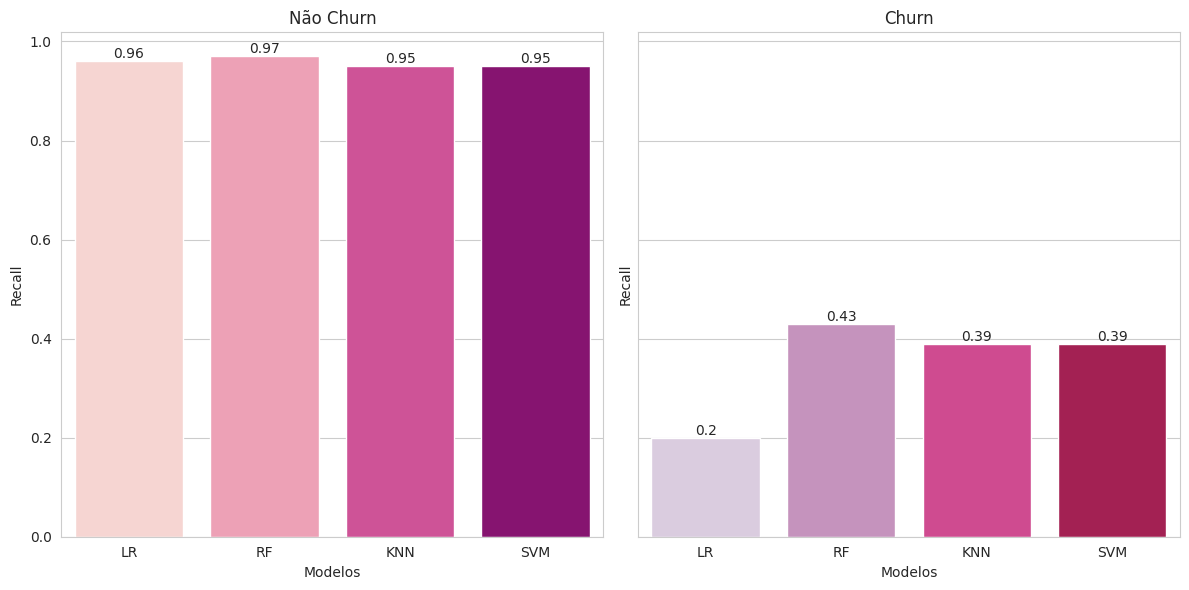

In [ ]:
modelos = ['LR', 'RF', 'KNN', 'SVM']
nao_churn = {'recall': [0.96, 0.97, 0.95, 0.95]}
churn = {'recall': [0.20, 0.43, 0.39, 0.39]}

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot(x=modelos, y=nao_churn['recall'], ax=axs[0], palette='RdPu')
axs[0].set_title('Não Churn')
axs[0].set_ylabel('Recall')
axs[0].set_xlabel('Modelos')
axs[0].bar_label(axs[0].containers[0], fontsize=10);
sns.barplot(x=modelos, y=churn['recall'], ax=axs[1], palette='PuRd')
axs[1].set_title('Churn')
axs[1].set_ylabel('Recall')
axs[1].set_xlabel('Modelos')
axs[1].bar_label(axs[1].containers[0], fontsize=10);

plt.tight_layout()
plt.show()

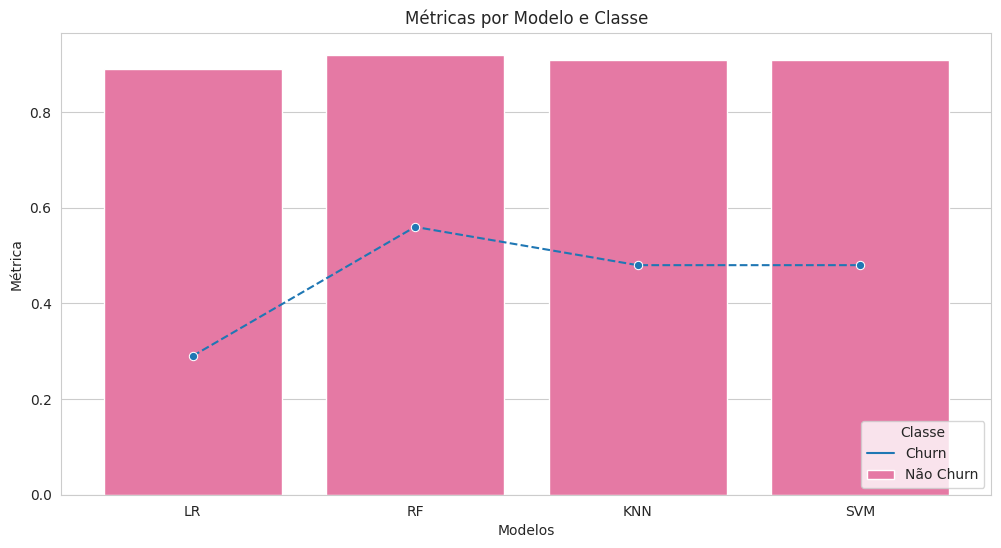

In [ ]:
modelos = ['LR', 'RF', 'KNN', 'SVM']
nao_churn = {'fscore': [0.89, 0.92, 0.91, 0.91]}
churn = {'fscore': [0.29, 0.56, 0.48, 0.48]}

df_nao_churn = pd.DataFrame({'Modelo': modelos, 'Métrica': nao_churn['fscore'], 'Classe': 'Não Churn'})
df_churn = pd.DataFrame({'Modelo': modelos, 'Métrica': churn['fscore'], 'Classe': 'Churn'})
df = pd.concat([df_nao_churn, df_churn])

plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='Métrica', hue='Classe', data=df[df['Classe'] == 'Não Churn'], palette='RdPu')
sns.lineplot(x='Modelo', y='Métrica', hue='Classe', data=df[df['Classe'] == 'Churn'], marker='o', linestyle='--', color='deeppink')

plt.title('Métricas por Modelo e Classe')
plt.xlabel('Modelos')
plt.ylabel('Métrica')
plt.legend(title='Classe', loc='lower right')
plt.show()


**Trabalhos Futuros**

- Dependendo dos requisitos do negócio, pode ser desejável ajustar o modelo para aumentar a revocação na classe Churn, mesmo que isso resulte em uma ligeira diminuição da precisão na mesma classe.
- Ajustar o limiar de decisão pode ajudar a equilibrar a sensibilidade e a especificidade do modelo, dependendo dos custos associados aos erros de classificação em cada classe.
- Considerar ajustes no modelo, como otimização de hiperparâmetros ou ajuste de limiar, para melhorar a revocação na classe Churn.
- Considerar a implementação de técnicas de ajuste de modelo ou seleção de características para melhorar a discriminação entre as classes.